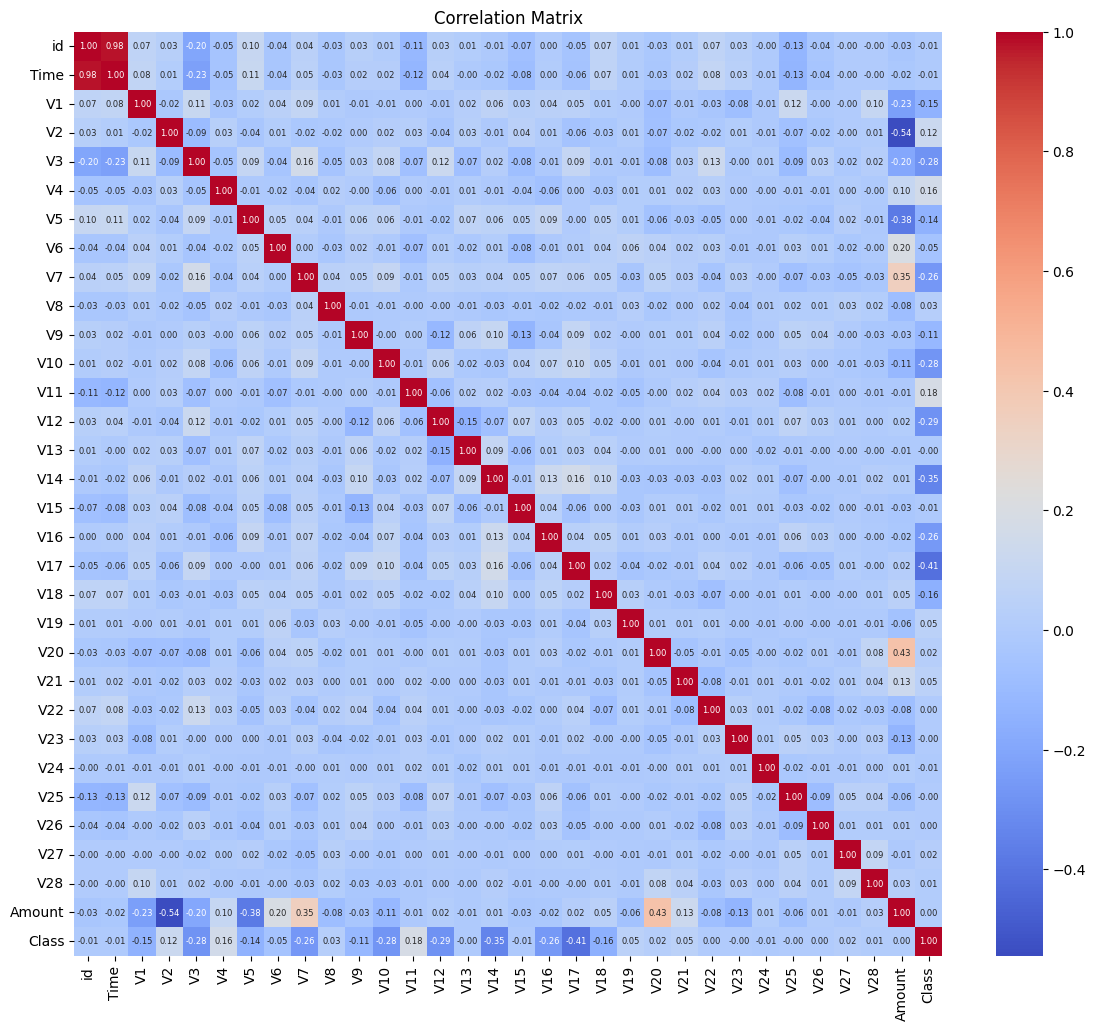

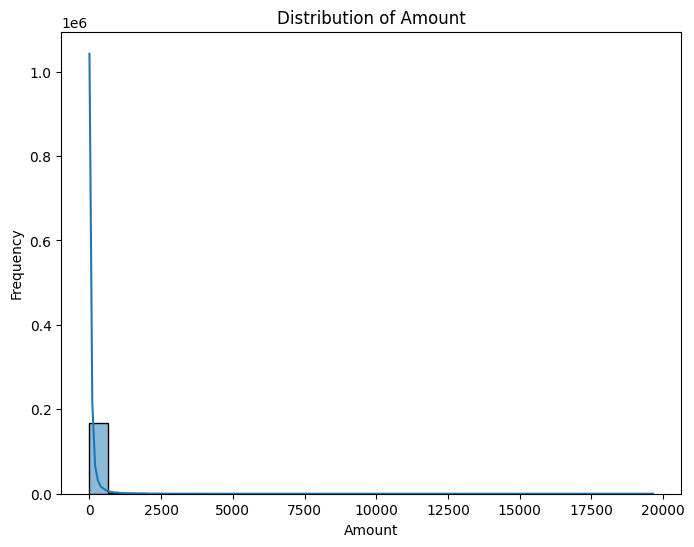

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# 데이터 불러오기
train = pd.read_csv("./data/train.csv")

# 상관 관계 행렬
corr = train.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 6})
plt.title('Correlation Matrix')
plt.show()

# Amount의 분포
plt.figure(figsize=(8, 6))
sns.histplot(train['Amount'], bins=30, kde=True)
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

In [2]:
# 이상치와 정상 데이터 분리
normal_data = train[train['Class'] == 0]
anomaly_data = train[train['Class'] == 1]

# 360개 정상 데이터를 test_data 용으로 분리
reserved_normal_for_test, remaining_normal = train_test_split(normal_data, test_size=(normal_data.shape[0]-360), random_state=42, shuffle=True)

# 나머지 정상 데이터를 이용하여 train 및 validation 데이터셋 생성 (8:2 비율)
train_normal, validation_normal = train_test_split(remaining_normal, test_size=0.20, random_state=42, shuffle=True)

# 이상치 데이터와 미리 분리해둔 정상 데이터를 합쳐서 test 데이터셋 생성 (1:1 비율)
test_data = pd.concat([reserved_normal_for_test, anomaly_data])
test_data = test_data.sample(frac=1, random_state=42).reset_index(drop=True)

# 결과 출력
print(f"Train set size: {train_normal.shape}")
print(f"Validation set size: {validation_normal.shape}")
print(f"Test set size: {test_data.shape}")

# Train set과 Validation set은 이상치를 포함하지 않는거 검증
assert train_normal['Class'].sum() == 0 and validation_normal['Class'].sum() == 0, "Train or Validation set contains anomalies"
print("Train and Validation sets are free of anomalies.")

# Test set은 이상치를 포함해야 하는거 검증
assert test_data['Class'].sum() > 0, "Test set does not contain any anomalies"
print("Test set contains anomalies.")

Train set size: (136130, 32)
Validation set size: (34033, 32)
Test set size: (720, 32)
Train and Validation sets are free of anomalies.
Test set contains anomalies.


In [3]:
from sklearn.preprocessing import StandardScaler

# 전처리 
def get_preprocessed_data(df):
    df_copy = df.copy()
    
    # 'id', 'Time' 컬럼 삭제
    if 'id' in df_copy.columns:
        df_copy.drop('id', axis=1, inplace=True)
    if 'Time' in df_copy.columns:
        df_copy.drop('Time', axis=1, inplace=True)

    # Amount 컬럼 StandardScaler로 정규화
    ss = StandardScaler()
    df_copy['Amount'] = ss.fit_transform(df_copy['Amount'].values.reshape(-1,1))

    return df_copy

# 각 데이터셋에 전처리 적용
train_normal_preprocessed = get_preprocessed_data(train_normal)
validation_normal_preprocessed = get_preprocessed_data(validation_normal)
test_data_preprocessed = get_preprocessed_data(test_data)

# 결과 출력
print(f"Train set size after preprocessing: {train_normal_preprocessed.shape}")
print(f"Validation set size after preprocessing: {validation_normal_preprocessed.shape}")
print(f"Test set size after preprocessing: {test_data_preprocessed.shape}")

Train set size after preprocessing: (136130, 30)
Validation set size after preprocessing: (34033, 30)
Test set size after preprocessing: (720, 30)


In [4]:
train_normal_preprocessed.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,136130.000000,136130.000000,136130.000000,136130.000000,136130.000000,136130.000000,136130.000000,136130.000000,136130.000000,136130.000000,...,136130.000000,136130.000000,136130.000000,136130.000000,136130.000000,136130.000000,136130.000000,136130.000000,1.361300e+05,136130.0
mean,-0.159733,0.030357,0.509840,0.106888,-0.164872,0.057954,-0.064448,0.031610,0.027551,-0.016025,...,-0.029912,-0.083159,-0.021417,0.008647,0.092810,0.012267,0.001557,0.001776,9.343065e-18,0.0
std,1.806262,1.592604,1.279273,1.349244,1.304095,1.289152,1.109986,1.159448,1.140121,1.028610,...,0.707020,0.662675,0.568888,0.599737,0.464584,0.490629,0.386131,0.306618,1.000004e+00,0.0
min,-56.407510,-72.715728,-33.680984,-5.519697,-42.147898,-26.160506,-26.548144,-50.943369,-6.105803,-11.208723,...,-22.889347,-10.933144,-25.356744,-2.836627,-7.081325,-2.604551,-22.565679,-11.710896,-3.555375e-01,0.0
25%,-0.984430,-0.539506,-0.062517,-0.745789,-0.824008,-0.689894,-0.581816,-0.162615,-0.653764,-0.516628,...,-0.230478,-0.545713,-0.170528,-0.333313,-0.195992,-0.330526,-0.065239,-0.027780,-3.331284e-01,0.0
50%,-0.179798,0.107678,0.623947,0.121798,-0.223989,-0.202264,-0.028990,0.055454,-0.074976,-0.109738,...,-0.054670,-0.066651,-0.036188,0.059317,0.136362,-0.059308,0.008448,0.021025,-2.661457e-01,0.0
75%,1.184880,0.797420,1.298338,0.931490,0.378144,0.444602,0.463653,0.348273,0.647306,0.409119,...,0.126685,0.362621,0.099336,0.416421,0.400372,0.272486,0.089103,0.077675,-4.395196e-02,0.0
max,2.439207,18.902453,9.382558,16.875344,34.801666,22.529298,36.677268,18.709255,15.594995,23.745136,...,22.614889,7.357255,19.002942,4.022866,7.519589,3.517346,11.135740,33.847808,7.987884e+01,0.0


In [5]:
# train 데이터셋
class_distribution = train_normal_preprocessed['Class'].value_counts(normalize=False)
print("Class distribution in test data (counts):")
print(class_distribution)


class_distribution_normalized = train_normal_preprocessed['Class'].value_counts(normalize=True)
print("\nClass distribution in test data (normalized):")
print(class_distribution_normalized)

Class distribution in test data (counts):
Class
0    136130
Name: count, dtype: int64

Class distribution in test data (normalized):
Class
0    1.0
Name: proportion, dtype: float64


In [ ]:
validation_normal_preprocessed.describe()

In [6]:
# validation 데이터셋
class_distribution = validation_normal_preprocessed['Class'].value_counts(normalize=False)
print("Class distribution in test data (counts):")
print(class_distribution)


class_distribution_normalized = validation_normal_preprocessed['Class'].value_counts(normalize=True)
print("\nClass distribution in test data (normalized):")
print(class_distribution_normalized)

Class distribution in test data (counts):
Class
0    34033
Name: count, dtype: int64

Class distribution in test data (normalized):
Class
0    1.0
Name: proportion, dtype: float64


In [7]:
test_data_preprocessed.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,...,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,7.200000e+02,720.000000
mean,-3.141598,2.289953,-3.705429,2.509428,-2.266829,-0.633849,-3.575427,0.407232,-1.446510,-3.321046,...,0.396287,-0.079453,-0.022949,-0.016023,0.096666,-0.010372,0.106378,0.046533,-3.947460e-17,0.500000
std,6.122399,3.980135,7.148831,3.322627,4.628349,1.896544,6.562752,5.643242,2.522486,5.026369,...,3.227200,1.280667,1.291572,0.541419,0.677967,0.449764,1.114610,0.451175,1.000695e+00,0.500348
min,-30.552380,-10.602409,-31.103685,-3.965035,-22.105532,-5.430971,-43.557242,-41.044261,-13.434066,-24.588262,...,-22.797604,-8.887017,-19.254328,-1.773928,-4.781606,-1.123534,-7.263482,-1.869290,-4.561351e-01,0.000000
25%,-3.719864,0.031917,-5.383072,0.045651,-2.730018,-1.576412,-4.437613,-0.099783,-2.504370,-5.407648,...,-0.194237,-0.570745,-0.251717,-0.359696,-0.228847,-0.314191,-0.046147,-0.043175,-4.503270e-01,0.000000
50%,-1.021611,1.092434,-0.524116,1.465638,-0.746564,-0.567035,-0.750044,0.207818,-0.701223,-0.863881,...,0.118731,-0.054004,-0.056329,0.022668,0.141774,-0.073136,0.076080,0.045079,-3.762001e-01,0.500000
75%,0.730521,3.367583,0.775973,4.438586,0.200893,0.122888,0.139333,1.090019,0.056222,-0.026757,...,0.766607,0.457645,0.142927,0.381696,0.463480,0.289777,0.465422,0.206210,3.602589e-02,1.000000
max,2.085703,22.057729,3.401139,12.114672,11.095089,6.474115,5.802537,20.007208,5.250796,8.884178,...,27.202839,8.361985,5.466230,1.167717,2.208209,1.246604,3.052358,2.685622,8.452869e+00,1.000000


In [8]:
# 테스트 데이터셋
class_distribution = test_data_preprocessed['Class'].value_counts(normalize=False)
print("Class distribution in test data (counts):")
print(class_distribution)


class_distribution_normalized = test_data_preprocessed['Class'].value_counts(normalize=True)
print("\nClass distribution in test data (normalized):")
print(class_distribution_normalized)

Class distribution in test data (counts):
Class
0    360
1    360
Name: count, dtype: int64

Class distribution in test data (normalized):
Class
0    0.5
1    0.5
Name: proportion, dtype: float64


In [ ]:
# 데이터셋 저장
train_normal_preprocessed.to_csv("./generated_data/train_data.csv", index=False)
validation_normal_preprocessed.to_csv("./generated_data/validation_data.csv", index=False)
test_data_preprocessed.to_csv("./generated_data/test_data.csv", index=False)